In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## Reference the Packages/Toolboxes

I use numpy to process arraies and matrices.  
I use pandas to read and process the original datasets.  
I use matplotlib.pyplot to plot decision statistic surfaces.  
To plot decision statistic surfaces, I also referenced the ECE580 course materials and the website below.  
https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07   

In [2]:
N0 = 300
N1 = 300
mean0 = np.array([1, 3])
mean1 = np.array([4, 5])
covariance0 = np.array([[1, 1], [1, 3]])
covariance1 = np.array([[2, -1], [-1, 4]])

In [3]:
rng = np.random.default_rng()
X0 = rng.multivariate_normal(mean = mean0, cov = covariance0, size = N0)
X1 = rng.multivariate_normal(mean = mean1, cov = covariance1, size = N1)
X = np.concatenate((X0, X1))
y0 = np.zeros(N0)
y1 = np.ones(N1)
y = np.concatenate((y0, y1))
data = np.hstack((y.reshape((N0+N1, 1)), X))
print(data.shape)
print(data[0:3])
print(X0.shape)
print(X1.shape)
print(X.shape)
print(y0.shape)
print(y1.shape)
print(y.shape)

(600, 3)
[[ 0.          0.83371455  1.45174303]
 [ 0.          0.2785657   3.6704976 ]
 [ 0.         -0.74545888  0.45292756]]
(300, 2)
(300, 2)
(600, 2)
(300,)
(300,)
(600,)


In [4]:
# print(np.mean(X0, axis = 0))
# print(np.mean(X1, axis = 0))
# print(np.mean(X, axis = 0))
# print(np.cov(X0, rowvar = False))
# print(np.cov(X1, rowvar = False))
# print(np.cov(X, rowvar = False))
# print(np.linalg.det(np.cov(X0, rowvar = False)))

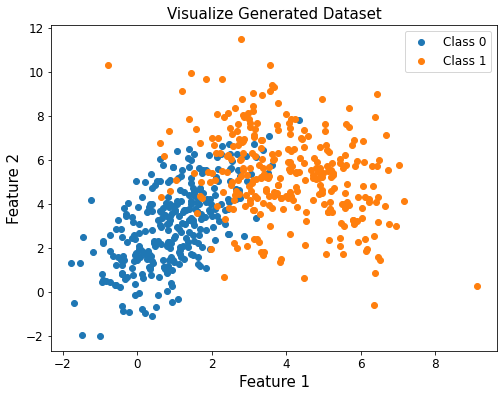

In [5]:
figure, axis = plt.subplots()
axis.scatter(X0[:,0], X0[:,1], label = "Class 0")
axis.scatter(X1[:,0], X1[:,1], label = "Class 1")
axis.set_xlabel("Feature 1", fontsize = 15)
axis.set_ylabel("Feature 2", fontsize = 15)
axis.set_title("Visualize Generated Dataset", fontsize = 15)
figure.set_size_inches(8, 6)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [6]:
# a = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
# print(a)
# print(np.linalg.inv(a))

In [7]:
def compute_weights (X, Xi, case) :
    d = X.shape[1]
    wi2 = np.zeros((d, d))
    wi1 = np.zeros(d)
    wi0 = 0
    
    covX = np.cov(X, rowvar = False)
    covX_simple = np.array([[covX[0,0], 0], [0, covX[1, 1]]])
    
    covXi = np.cov(Xi, rowvar = False)
    covXi_simple = np.array([[covXi[0,0], 0], [0, covXi[1,1]]])
    
    inv_covX = np.linalg.inv(covX)
    inv_covX_simple = np.linalg.inv(covX_simple)
    
    inv_covXi = np.linalg.inv(covXi)
    inv_covXi_simple = np.linalg.inv(covXi_simple)
    
    det_covX = np.linalg.det(covX)
    det_covXi = np.linalg.det(covXi)
    det_covXi_simple = np.linalg.det(covXi_simple)
    
    meanXi = np.mean(Xi, axis = 0)
    log_pri_wi = np.log(float(Xi.shape[0] / X.shape[0]))
    
    if case == "Q2" : 
        # Xi
        wi2 = float(-1/2) * inv_covXi 
        wi1 = np.dot(inv_covXi, meanXi)
        wi0 = float(-1/2) * np.dot(meanXi.T, np.dot(inv_covXi, meanXi)) - float(1/2) * np.log(det_covXi) + log_pri_wi
    if case == "Q3" :
        # Xi
        wi2 = float(-1/2) * inv_covXi_simple
        wi1 = np.dot(inv_covXi_simple, meanXi)
        wi0 = float(-1/2) * np.dot(meanXi.T, np.dot(inv_covXi_simple, meanXi)) - float(1/2) * det_covXi_simple + log_pri_wi
    if case == "Q4" :
        # X
        wi2 = np.zeros((d, d))
        wi1 = np.dot(inv_covX, meanXi)
        wi0 = float(-1/2) * np.dot(meanXi.T, np.dot(inv_covX, meanXi)) + log_pri_wi
    if case == "Q5" :
        # X
        wi2 = np.zeros((d, d))
        wi1 = np.dot(inv_covX_simple, meanXi)
        wi0 = float(-1/2) * np.dot(meanXi.T, np.dot(inv_covX_simple, meanXi)) + log_pri_wi
    return wi2, wi1, wi0

In [8]:
def compute_gix (x, wi2, wi1, wi0) :
    gix = np.dot(x.T, np.dot(wi2, x)) + np.dot(wi1.T, x) + wi0
    return gix

In [9]:
def Bayes_Classifier (X, grid, case) : 
    # Training
    N = X.shape[0]
    X0 = np.copy(X[0:int(N/2), :])
    X1 = np.copy(X[int(N/2):int(N-1), :])
    w02, w01, w00 = compute_weights(X, X0, case)
    w12, w11, w10 = compute_weights(X, X1, case)
    
    # Testing for decision statistic surfaces
    testN = grid.shape[0]
    y_proba = np.zeros(testN)
    for i in range(testN) :
        g0x = compute_gix(grid[i,:], w02, w01, w00)
        g1x = compute_gix(grid[i,:], w12, w11, w10)
        gx = g1x - g0x
        y_proba[i] = gx
    return y_proba

In [10]:
def visualize_dss (data, case) :
    x1max = np.max(data[:, 1])
    x1min = np.min(data[:, 1])
    x2max = np.max(data[:, 2])
    x2min = np.min(data[:, 2])
    x1Range = x1max - x1min
    x2Range = x2max - x2min
    x1 = np.linspace((x1min - (0.2 * x1Range)), (x1max + (0.2 * x1Range)), 251)
    x2 = np.linspace((x2min - (0.2 * x2Range)), (x2max + (0.2 * x2Range)), 251)
    xx, yy = np.meshgrid(x1, x2)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1, r2))
    
    yhat = Bayes_Classifier(data[:, 1:], grid, case)
    yhat_H1 = np.copy(yhat)
    
    zz = yhat_H1.reshape(xx.shape)
    figure, axis = plt.subplots()
    c1 = axis.contourf(xx, yy, zz, cmap = mpl.cm.cool)
    plt.colorbar(c1)
    
    c2 = axis.contour(xx, yy, zz >= 0.0, colors = "r", linewidths = 3)
    axis.scatter(data[data[:,0]==0., 1], data[data[:,0]==0., 2], label = "H0 Data", linewidths = 2, c = "k")
    axis.scatter(data[data[:,0]==1., 1], data[data[:,0]==1., 2], label = "H1 Data", linewidths = 2, c = "g")
    figure.set_size_inches((9, 6))
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.legend(fontsize = 12)
    plt.show()
    return None

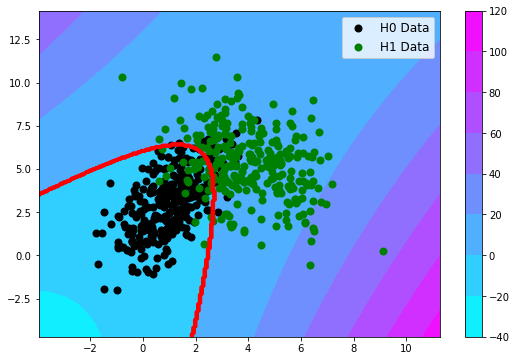

In [11]:
visualize_dss(data, case = "Q2")

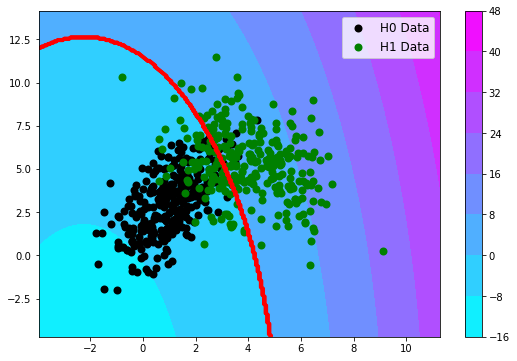

In [12]:
visualize_dss(data, case = "Q3")

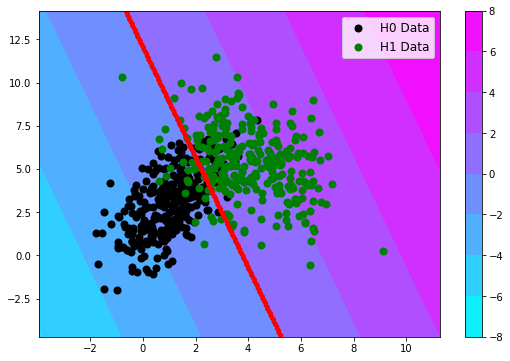

In [13]:
visualize_dss(data, case = "Q4")

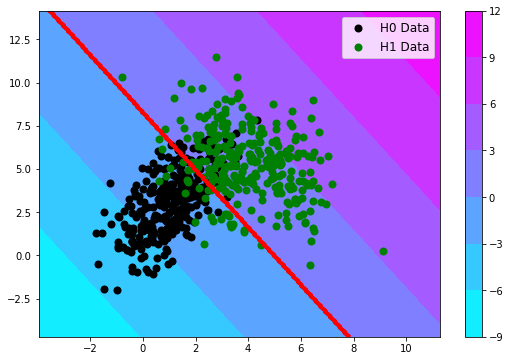

In [14]:
visualize_dss(data, case = "Q5")